# Librairies importation

In [1]:
import pandas as pd
import numpy as np
import scipy.io
import matplotlib as mpl
import matplotlib.pyplot as plt
import networkx as nx
import scipy.io as sio
from scipy.stats import norm
import scipy.stats
import itertools 
import pcalg
from pyvis.network import Network

from Structure_Learning import *
from Causal_inference import *
from gsq.ci_tests import ci_test_bin, ci_test_dis

No GPU automatically detected. Setting SETTINGS.GPU to 0, and SETTINGS.NJOBS to cpu_count.


# Inputs

In [2]:
#store_code = 'FRH001'
#store_code = 'FR0121'
store_code = 'FRF043'

# list of operation considered for analysis
op = ['POS_LP1', 'T04', 'T10','T14', 'T05','ZFID04', 'T13', 'POS_ZFID05',
       'ZFID05', 'ZFID09', 'TC1', 'ZFID03', 'T17', 'ZBBK01', 'POS_ZFID04','CO2']

# Data importation

In [3]:
data = pd.read_csv('FRA' + '.csv')
display(data.head())
data = data[data['store_code'] == store_code]
mask = [data['operation'][i] in op for i in data.index] 
data = data[mask]
display(data.head())

D, columns = data_formating(data)

,date,store_code,operation,duration
0,2021-05-11T19:14:41.337+0200,FRH001,FE17,42588
1,2021-05-11T19:14:41.321+0200,FRH001,FE17,0
2,2021-05-11T19:14:36.282+0200,FRH001,FE17,5023
3,2021-05-11T19:14:36.251+0200,FRH001,FE17,16
4,2021-05-11T19:14:36.064+0200,FRH001,FE17,171


,date,store_code,operation,duration
5962,2021-05-11T16:38:41.764+0200,FRF043,TC1,85005
6083,2021-05-11T16:36:27.003+0200,FRF043,TC1,83742
6975,2021-05-11T16:19:13.379+0200,FRF043,T10,188
6976,2021-05-11T16:19:13.379+0200,FRF043,T04,188
6980,2021-05-11T16:19:10.118+0200,FRF043,T14,3042


# Strucural discovery

In [4]:
columns = np.arange(D.shape[0])
A, skeletons, v_struct = PC(D,columns)

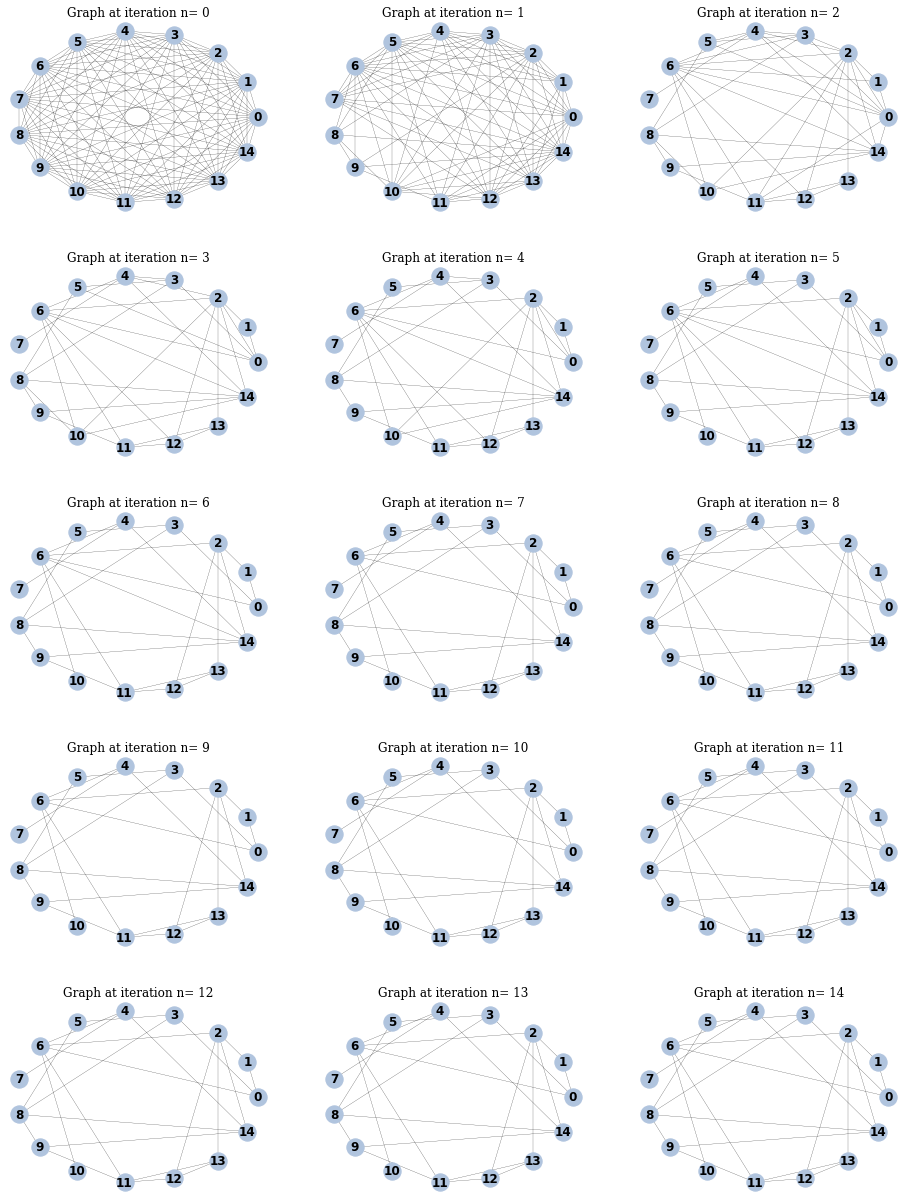

In [5]:
#  Categorical Data
b = 3  # number of rows
a = 1 + len(skeletons) // b  # number of columns
c = 1  # initialize plot counter

fig = plt.figure(figsize=(16,26))
plt.rc('font', family='serif')

for i in range(len(skeletons)):
    plt.subplot(a, b, c)
    plt.title('Graph at iteration n= ' + str(i))
    graph = nx.Graph(skeletons[i])
    #label = {i : columns[i] for i in range(len(columns))}  
    #graph = nx.relabel_nodes(graph, label)
    nx.draw_circular(graph, with_labels=True, font_weight='bold',width=0.2,node_color='lightsteelblue')
    plt.subplots_adjust(hspace = 0.3)
    
    c = c + 1

#fig.tight_layout()
plt.show()

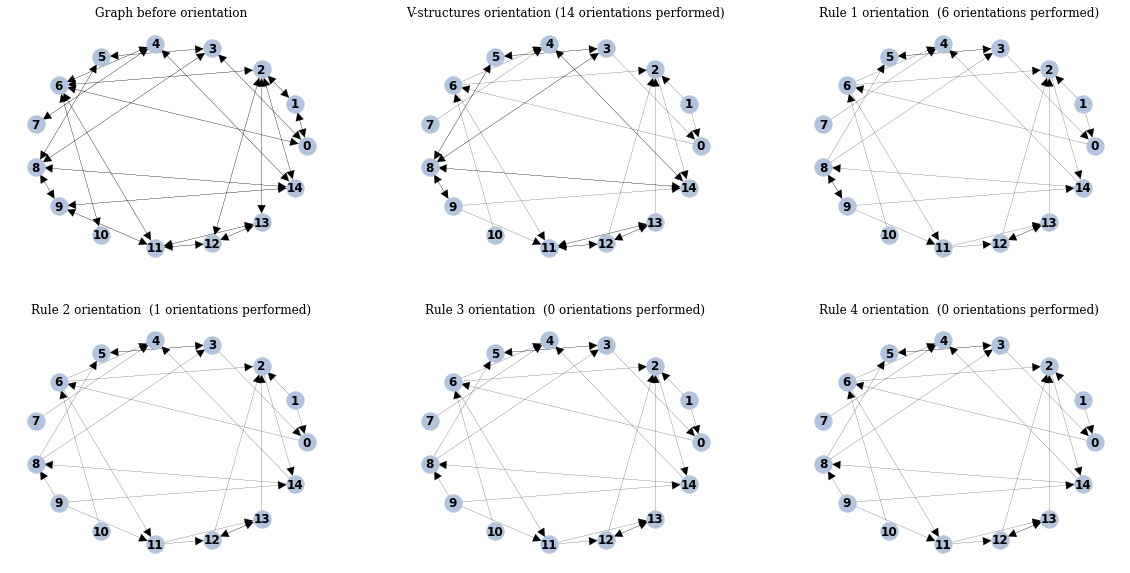

In [6]:
G1 = edge_orientation_evolution(v_struct,A)